<div style="text-align: center;">
    <div style="display: inline-block;">
        <img src="dependencies/ghr_libraries/clim4health/tutorials/figures/general/logo_bsc.png" width="275px" height="275px" />
    </div>
     <div style="display: inline-block;">
        <img src="dependencies/ghr_libraries/ghrexplore/images/logo.jpg" width="300" height="300">
    </div>
    <br></br>
    <h1>Tutorial: <code>ghrexplore</code></h1>
    
</div>
<hr style="border: 1px solid #000; width: 80%; margin: 20px auto;">

# 🧭 Table of Contents
Here’s what we’ll cover in this notebook:

- [1. Introduction](#1.-Introduction)
- [2. Setup and Data Loading](#2.-Setup-and-Data-Loading)
- [3. Statistics](#4.-Statistics)

# 1. Introduction

# 2. Setup and Data Loading

In [1]:
options(warn = -1)

In [2]:
install.packages('devtools')

path_cstools     <- './dependencies/bsc_libraries/cstools-master.tar.gz'
path_startr      <- './dependencies/bsc_libraries/startR-master.tar.gz'

install.packages(path_cstools, repos = NULL, type = "source")
install.packages(path_startr , repos = NULL, type = "source")

Installing package into 'C:/Users/rcapella/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rcapella\AppData\Local\Temp\RtmpaeTtxh\downloaded_packages


Installing package into 'C:/Users/rcapella/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Installing package into 'C:/Users/rcapella/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [3]:
setwd("dependencies/ghr_libraries/ghrexplore/")
devtools::load_all()
devtools::document()

ℹ Loading ghrexplore
ℹ Updating ghrexplore documentation
ℹ Loading ghrexplore


In [4]:
# Load data
# dengue_MS is spatiotemporal data
data(dengue_MS)
# dengue_SP is timeseries data 
data(dengue_SP)
# dengue map
data("map_MS")

### make testing data sets ----
data.test <- dengue_MS %>% 
  filter(micro_code != "50001") %>%
  mutate(tmin = case_when(
    date == "2000-01-01" & micro_code == "50002" ~ NA, 
    T ~ tmin
  ))

# 3. Statistics

🗺️ **Map of Mato Grosso do Sul**  
Let’s start by visualizing the **map of Mato Grosso do Sul**, Brazil. This map will help us understand the **spatial distribution** of dengue cases across its administrative micro-regions.


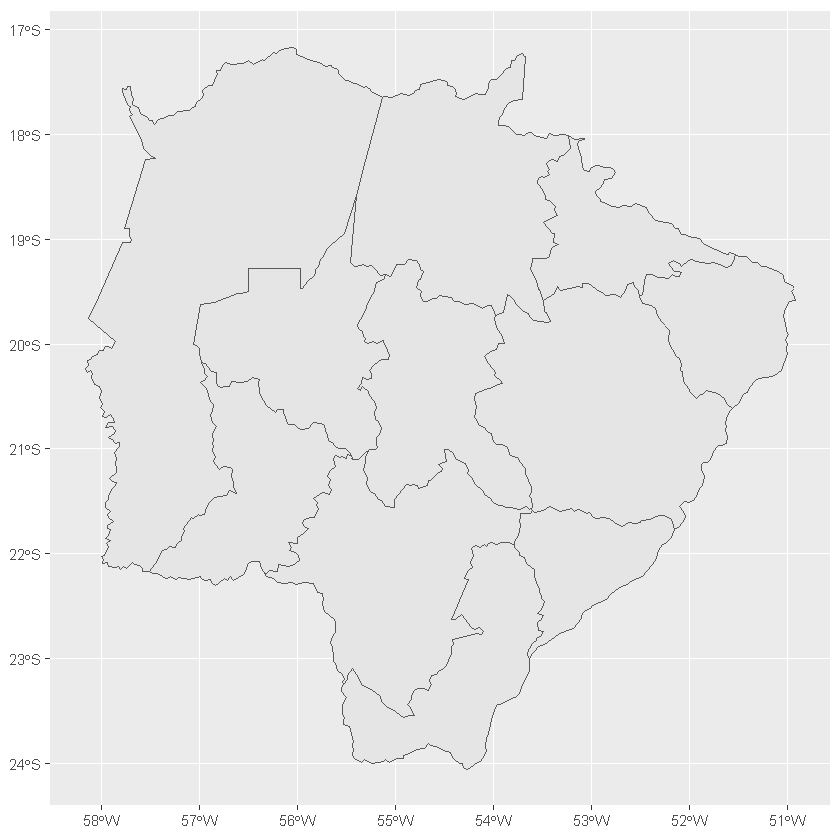

In [5]:
# Show the map that we are going to use
ggplot() +
  geom_sf(data = map_MS)

🌡️📈 **Yearly Minimum Temperature Across Micro-Regions**  
This time series plot shows the **minimum daily temperature** (`tmin`) aggregated monthly across the 11 micro-regions of **Mato Grosso do Sul**.  

By visualizing these trends, we can explore how **temperature variations** over time may influence **dengue transmission dynamics**, as mosquito activity is often **climate-sensitive**.

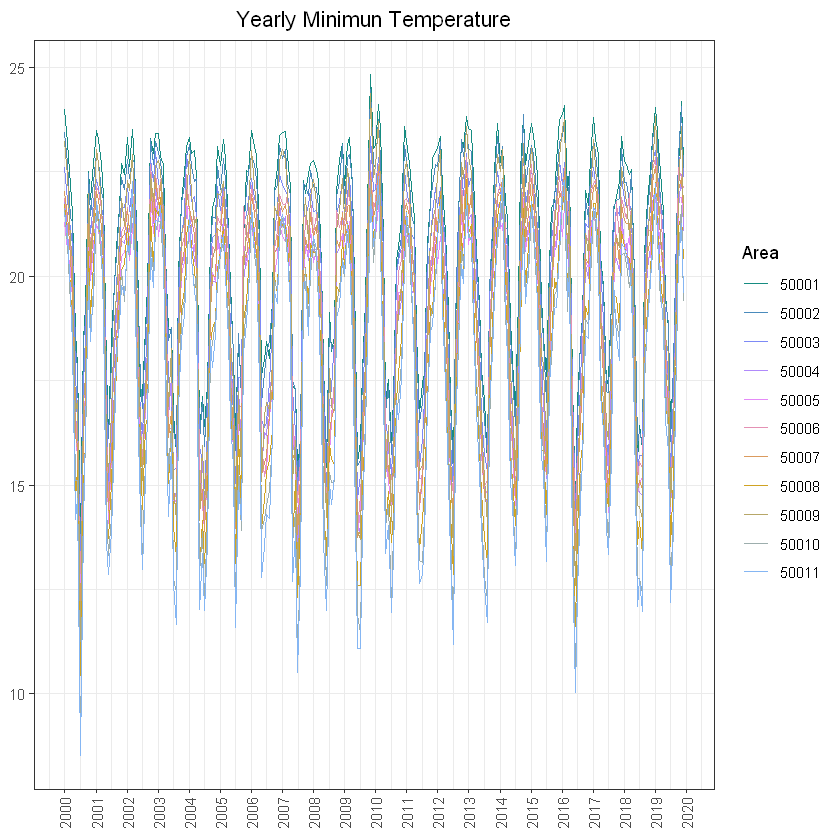

In [6]:
dengue_MS %>%
  plot_timeseries(var = "tmin",
                  type = "cov",
                  time = "date",          
                  area = "micro_code",   
                  title = "Yearly Minimun Temperature") 



🌡️📊 **Time Series of Temperature Variables (Plotted Separately)**  
In the following section, we’ll generate **separate time series plots** for key temperature-related variables across all micro-regions of **Mato Grosso do Sul**.

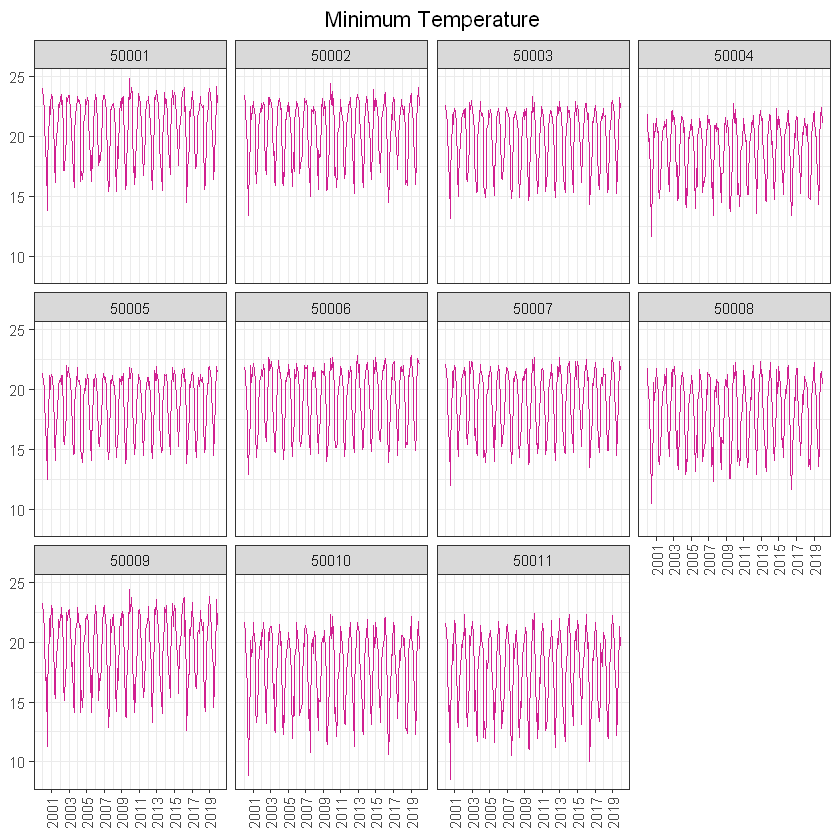

In [7]:
# Plot TS of temperature: plots in separate graphs
dengue_MS %>%
  plot_timeseries(var = "tmin",
                  time = "date",
                  area = "micro_code",
                  panel = TRUE,           # The multiple plots 
                  var_label= "Minimum Temperature",
                  palette = "violetred")


🗺️📉 **Average Minimum Temperature by Meso-Region and Year**  
This time series plot shows the **average minimum temperature (`tmin`)** across the **meso-regions** of **Mato Grosso do Sul**, aggregated **yearly**.

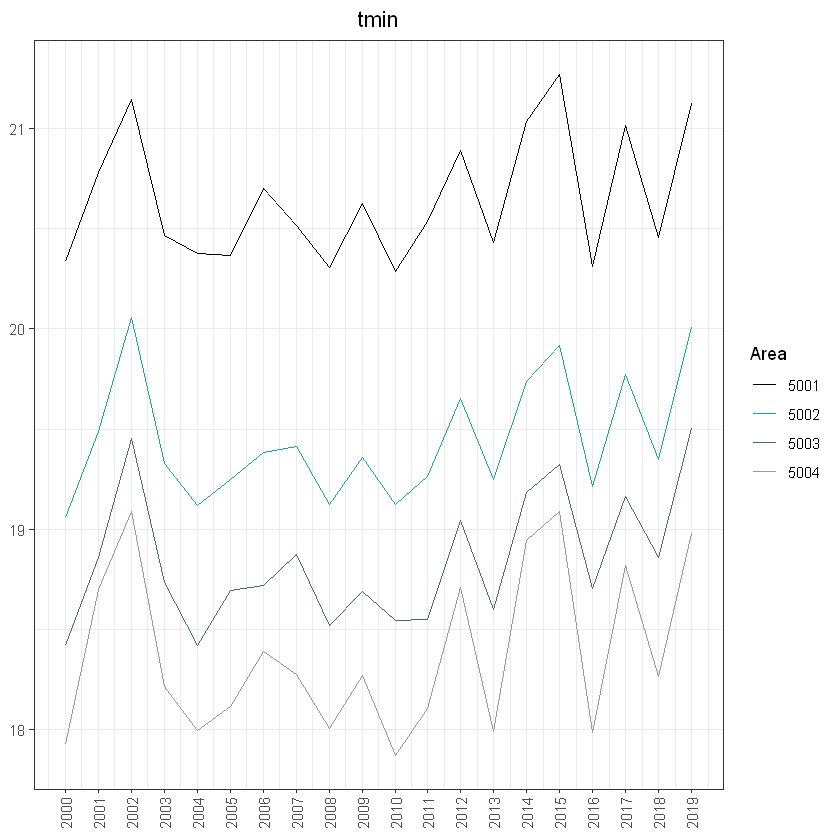

In [8]:
dengue_MS %>%
  plot_timeseries(var = "tmin",
                  time = "date",
                  area = "micro_code",
                  aggregate_space = "meso_code",  # The target for aggregation
                  aggregate_space_fun = "mean",   # Function for aggregation
                  aggregate_time = "year",
                  palette = "Colorblind")


🦟📆 **Monthly Dengue Cases by Micro-Region**  
This time series plot displays the **monthly number of reported dengue cases** across all **micro-regions** of **Mato Grosso do Sul**.

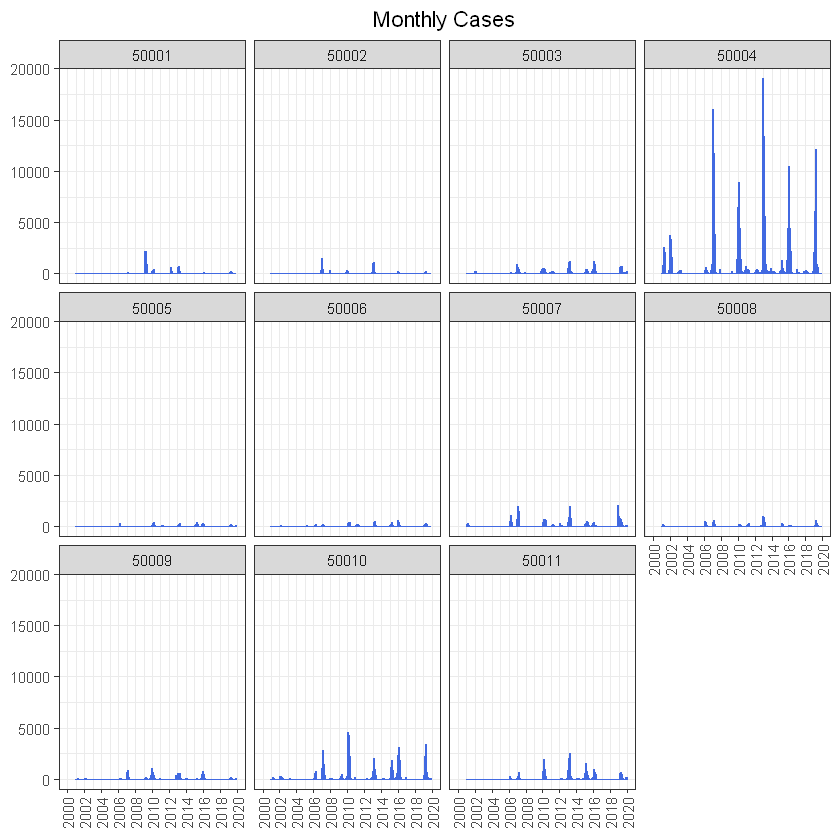

In [9]:
dengue_MS %>% 
  plot_timeseries(var = "dengue_cases", # Variable defining the cases 
                  type = "counts",
                  time = "date",          # Variable defining the date "dd-mm-yyyy"
                  area = "micro_code",    # Variable defining the spatial unit
                  title= "Monthly Cases",
                  palette = "royalblue") 



🦟📈 **Dengue Incidence Over Time – Faceted by Micro-Region**  
This plot shows the **incidence of dengue cases** over time, broken down into **individual panels for each micro-region** in **Mato Grosso do Sul**.

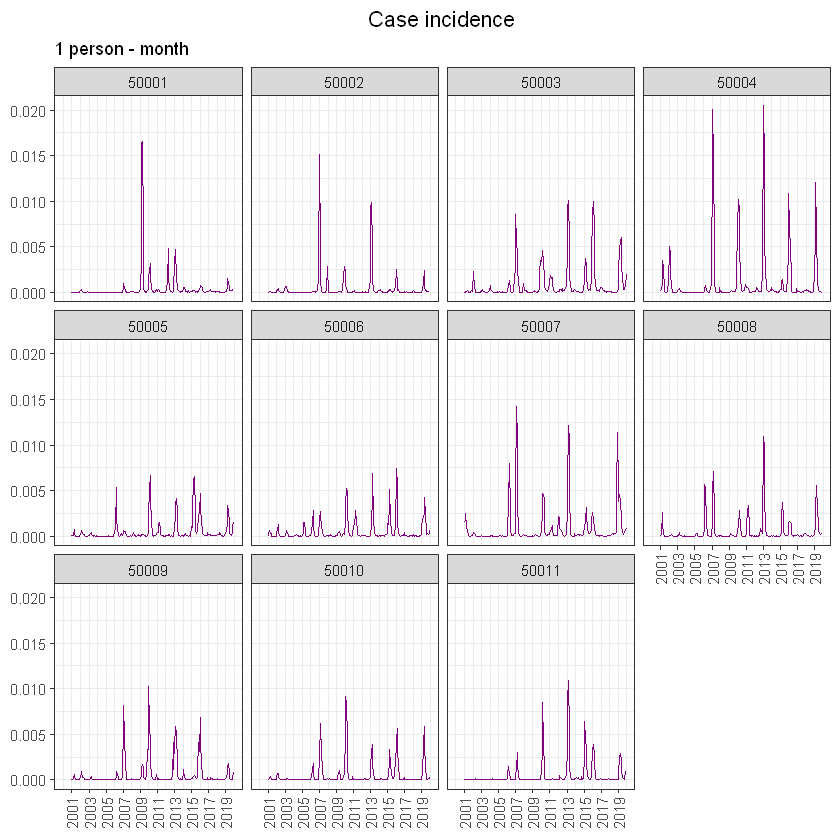

In [10]:
# Plot TS of incidence: with panels by area 
dengue_MS %>% 
  plot_timeseries(var = "dengue_cases", # Variable defining the cases 
                  type = "inc",
                  pop = "population",
                  time = "date",          # Variable defining the date "dd-mm-yyyy"
                  area = "micro_code",    # Variable defining the spatial unit
                  panel = TRUE,           # The multiple plots 
                  palette = "#800080",
                  pt=1)

🌡️🔥 **Heatmap of Minimum Temperature – Aggregated Across Micro-Regions**  
This heatmap displays the **minimum temperature (`tmin`)** over time, aggregated **across all micro-regions** in **Mato Grosso do Sul**.


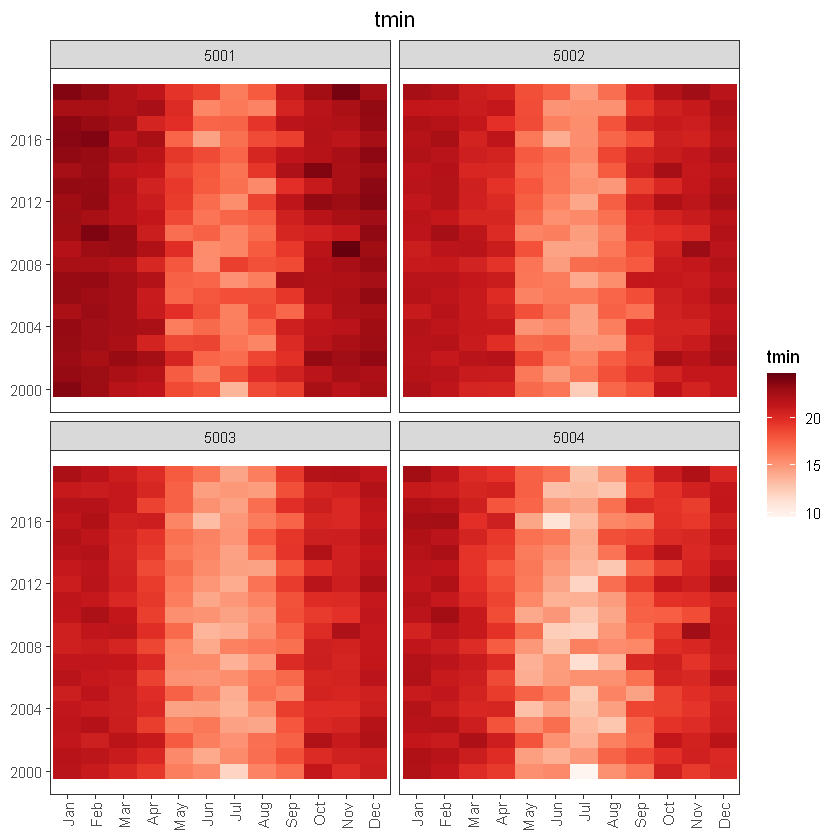

In [11]:
# Plot Heatmap of temperature: aggregate across space
dengue_MS %>%
  plot_heatmap(var = "tmin",
                   time = "date",
                   area = "micro_code",
                   aggregate_space = "meso_code",   # Aggregation target
                   aggregate_space_fun = "mean",    # Function for aggregation
                   palette = "Reds")


🌡️🦟 **Heatmap of Dengue Case Counts – Custom Centering**  
This heatmap visualizes the **number of dengue cases** over time for each **micro-region** in **Mato Grosso do Sul**, using a **custom color centering** to enhance interpretability.


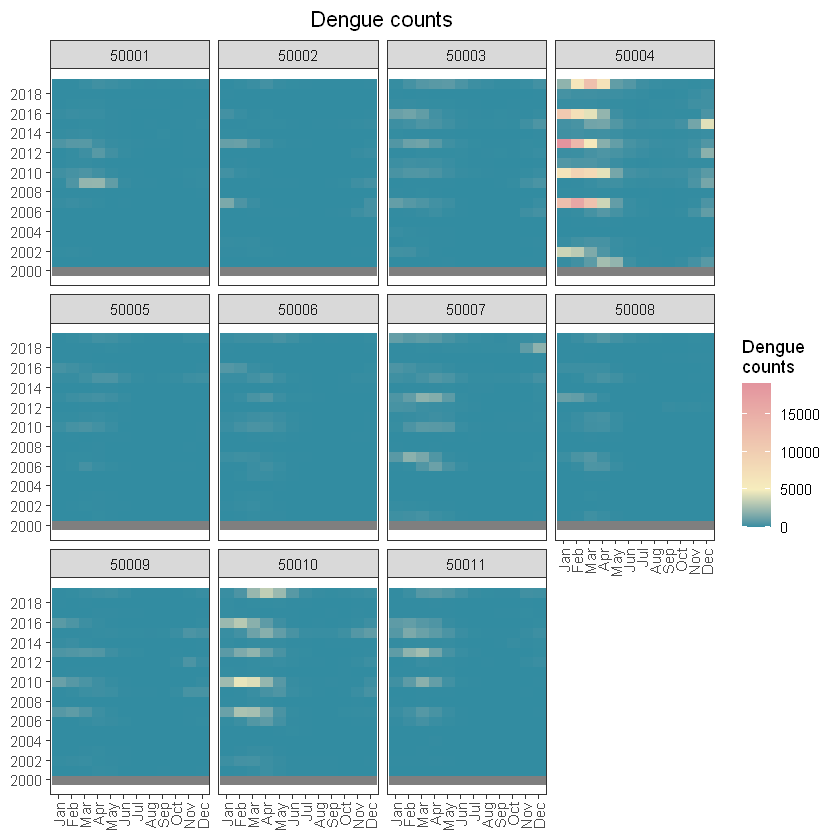

In [12]:
# Plot Heatmap of case counts custom centering
dengue_MS %>%
  plot_heatmap(var = "dengue_cases", # Variable defining the cases 
               type = "counts",
               time = "date",          # Variable defining the date "dd-mm-yyyy"
               area = "micro_code",  
               palette = "BlYlRd", 
               title = "Dengue counts", 
               var_label = "Dengue \ncounts",
               centering = 5000)  


🌤️📅 **Seasonal Patterns in Climate Covariates**  
In this section, we explore the **seasonality of key environmental covariates**, such as **temperature**, **precipitation**, or **humidity**, across the micro-regions of **Mato Grosso do Sul**.


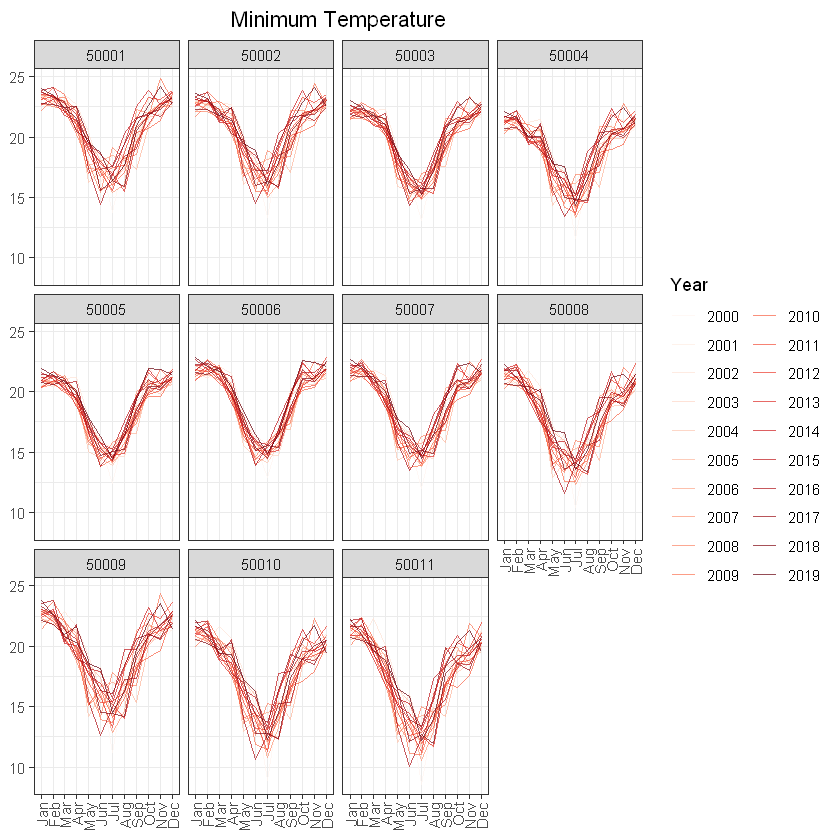

In [13]:

## plot_seasonality  covariates ----
dengue_MS %>%
  plot_seasonality(var = "tmin",                    # Variable to be plotted
                   time = "date",                   # Variable defining the date "dd-mm-yyyy"
                   area = "micro_code",
                   var_label = "Minimum Temperature", 
                   palette= "Reds")   


🗺️📊 **Yearly Mean Dengue Cases by Micro-Region**  
This map illustrates the **average number of dengue cases per year** for each **micro-region** in **Mato Grosso do Sul**.

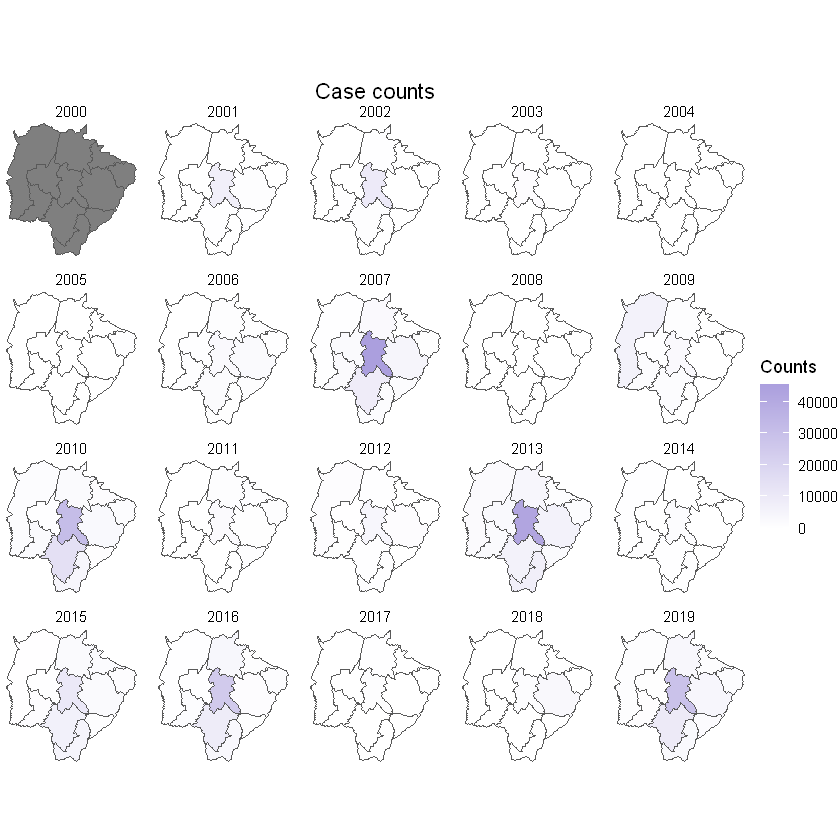

In [14]:
# Yearly mean cases
dengue_MS %>% 
  plot_map(var = "dengue_cases",         # Variable to be plotted 
           type = "counts",
           time = "date",        # Variable defining the date "dd-mm-yyyy"
           area = "micro_code",  # Variable defining area in the dataframe
           pop = "population",
           map = map_MS,         # the sf object for the map 
           map_area = "code",
           palette = "Purp")


📍📉 **Spatial Average of Dengue Cases Across Micro-Regions**  
In this section, we calculate the **spatial average** of dengue cases across all micro-regions in **Mato Grosso do Sul** for each time point.

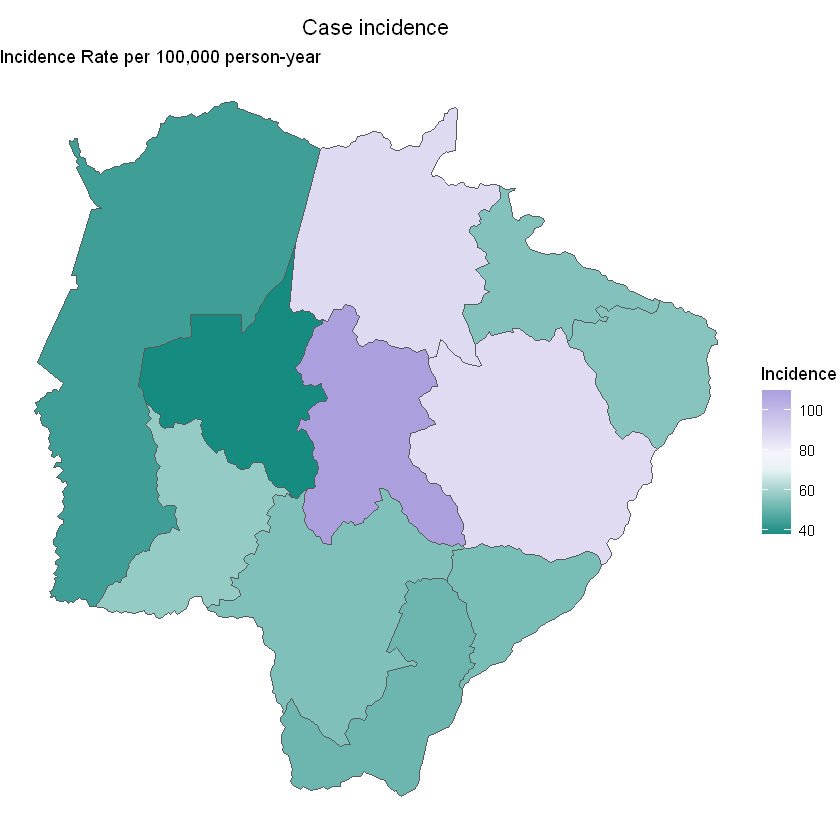

In [15]:
# Spatial average
dengue_MS %>% 
  plot_map(var = "dengue_cases",         # Variable to be plotted 
           type = "inc",
           time = "date",        # Variable defining the date "dd-mm-yyyy"
           area = "micro_code",  # Variable defining area in the dataframe
           pop = "population",
           map = map_MS,         # the sf object for the map 
           map_area = "code",    # Variable defining the area in the sf object
           by_year = FALSE)


🔗📊 **Correlation Matrix – Exploring Variable Relationships**  
In this section, we generate a **correlation matrix** to examine how different variables (such as dengue cases, temperature, precipitation, etc.) are **related** to one another across the dataset.

               Dengue_cases Pop_density        Tmax         Tmin         Pdsi
Dengue_cases     1.00000000   0.2846834  0.04097108  0.090767913  0.088593789
Pop_density      0.28468336   1.0000000 -0.19703073 -0.120210133  0.062315195
Tmax             0.04097108  -0.1970307  1.00000000  0.879162401 -0.038970901
Tmin             0.09076791  -0.1202101  0.87916240  1.000000000 -0.009183573
Pdsi             0.08859379   0.0623152 -0.03897090 -0.009183573  1.000000000
Urban            0.16762448   0.4193885  0.18075960  0.050611064  0.097575520
Water_network    0.09275016   0.1722578  0.06406097  0.089436190 -0.016236066
Water_shortage   0.02652887   0.2693830 -0.18720845 -0.185504467  0.144991012
                     Urban Water_network Water_shortage
Dengue_cases    0.16762448    0.09275016     0.02652887
Pop_density     0.41938850    0.17225783     0.26938302
Tmax            0.18075960    0.06406097    -0.18720845
Tmin            0.05061106    0.08943619    -0.18550447
Pdsi            0.

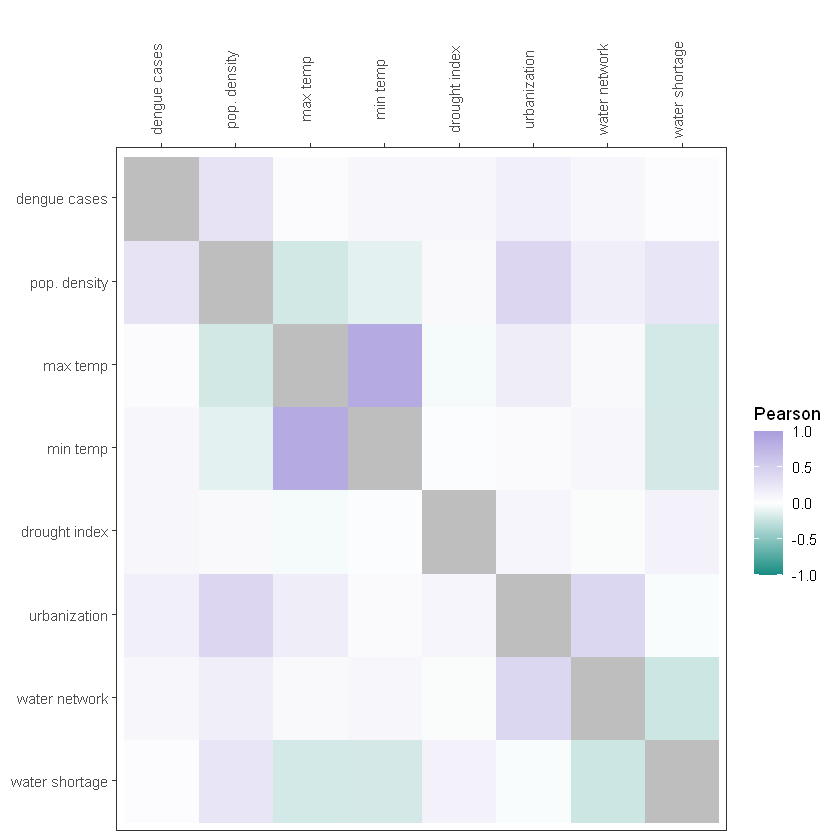

In [16]:
# Correlation matrix
dengue_MS %>% 
  plot_correlation(var = c("dengue_cases","pop_density", 
                           "tmax", "tmin", "pdsi", "urban",
                           "water_network", "water_shortage"),  
                   method = "pearson",
                   var_label = c("dengue cases","pop. density", 
                                 "max temp", "min temp", "drought index", "urbanization",
                                 "water network", "water shortage"),
                   print=TRUE) 
